# 导包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import warnings
import time
%matplotlib inline

plt.rcParams['font.sans-serif']=['FangSong'] 
plt.rcParams['axes.unicode_minus']=False
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

字体设置注意，修改配置文件

# 分析

## 近半年可转债上市首日涨幅

In [2]:
df = pd.read_pickle("./qqps_data.pkl")
df

,ts_code,bond_short_name,stk_code,list_date,cb_price,shd_ration_ratio,record_date_price,pay_date_price,onl_winning_rate
0,113543.SH,欧派转债,603833.SH,2019-09-04,126.310,3.5570,101.01,104.50,0.0558
1,123029.SZ,英科转债,300677.SZ,2019-09-10,116.900,2.3687,15.71,16.20,0.0396
2,128073.SZ,哈尔转债,002615.SZ,2019-09-11,111.400,0.7309,6.13,6.04,0.0383
3,123030.SZ,九洲转债,300040.SZ,2019-09-12,109.509,0.8978,5.60,5.73,0.0413
4,128071.SZ,合兴转债,002228.SZ,2019-09-16,107.500,0.5093,3.87,4.01,0.0860
...,...,...,...,...,...,...,...,...,...
66,123042.SZ,银河转债,300619.SZ,2020-02-14,111.111,2.2316,25.16,25.11,0.0042
67,113031.SH,博威转债,601137.SH,2020-02-17,131.140,1.7870,11.87,11.73,0.0217
68,128094.SZ,星帅转债,002860.SZ,2020-02-19,116.750,2.3897,24.82,23.99,0.0024
69,113563.SH,柳药转债,603368.SH,2020-02-24,125.740,3.1000,36.02,34.98,0.0094


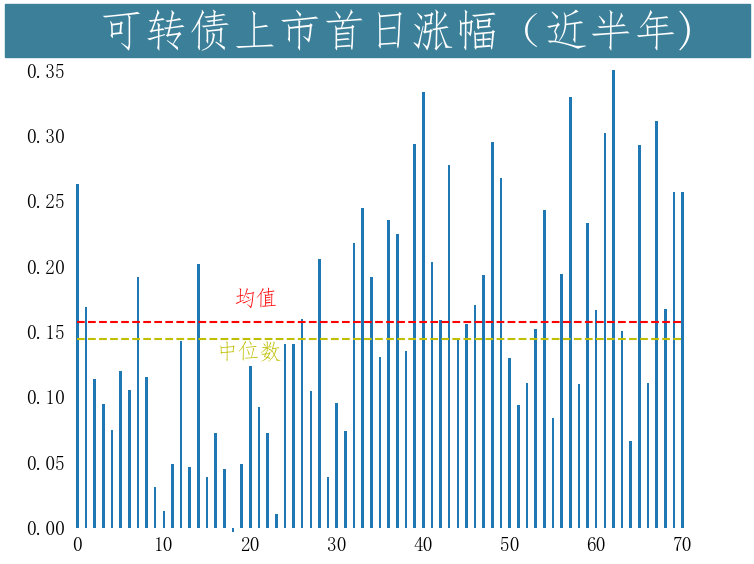

In [3]:
cb_zf = ((df["cb_price"]-100)/100).values
fig,ax = plt.subplots(figsize=(8,6))
fig.text(x=0.05, y=0.92, s='    可转债上市首日涨幅（近半年)  ', fontsize=32, 
         weight='bold', color='white', backgroundcolor='#3c7f99')
ax.bar(list(range(len(cb_zf))),cb_zf,width=0.3)
ax.tick_params(axis="both",labelsize=14,length=0)
ax.hlines(np.mean(cb_zf),xmin=0,xmax=70,linestyles="--",colors="r")
ax.text(18,0.17,"均值",fontdict={'size':16,"color":"red"})
ax.hlines(np.median(cb_zf),xmin=0,xmax=70,linestyles="--",colors="y")
ax.text(16,0.13,"中位数",fontdict={'size':16,"color":"y"})
ax.margins(0.01,0)
plt.box(False)

df["cb_price"]的数据为index和value的两列数据<p>
ax.tick_params(axis="both",labelsize=14,length=0) 坐标轴标签设置，labelsize为字体大小，length为刻度线长度<p>
ax.text(18,0.17,"均值",fontdict={'size':16,"color":"red"}) 图中注释，x，y坐标为左下角的坐标<p>
ax.margins(0.01,0) 坐标轴与图像之间的间隔<p>
plt.box(False) 图像外侧框线

## 可转债中签率（单位%）

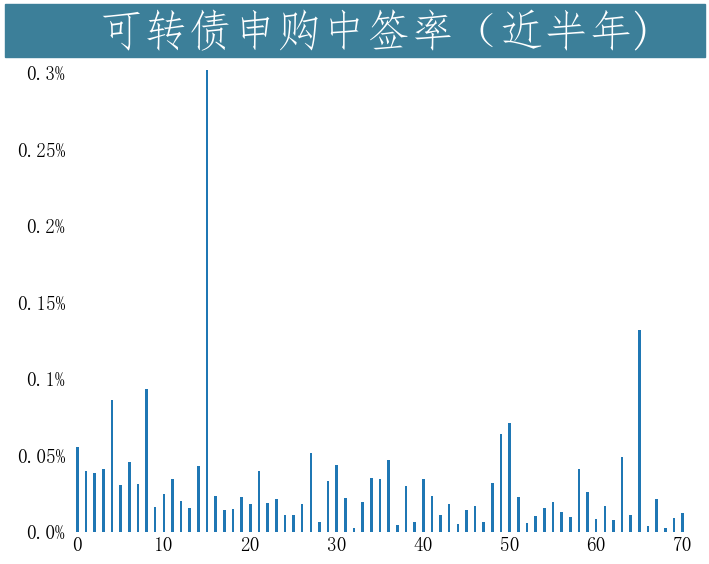

In [4]:
cb_zql = df.onl_winning_rate.values
mean_cb_zql = np.mean(cb_zql)
fig,ax = plt.subplots(figsize=(8,6))
fig.text(x=0.05, y=0.92, s='    可转债申购中签率（近半年)  ', fontsize=32, 
         weight='bold', color='white', backgroundcolor='#3c7f99')
ax.bar(list(range(len(cb_zql))),cb_zql,width=0.3)
ax.tick_params(axis="both",labelsize=14,length=0)
ax.margins(0.01,0)
ax.set_yticklabels([str(np.round(0.05*i,2))+"%" for i in range(7)])
plt.box(False)

ax.set_yticklabels([str(np.round(0.05*i,2))+"%" for i in range(7)]) 手动设置标签

## 配售收益率、正股波动收益率、总收益率

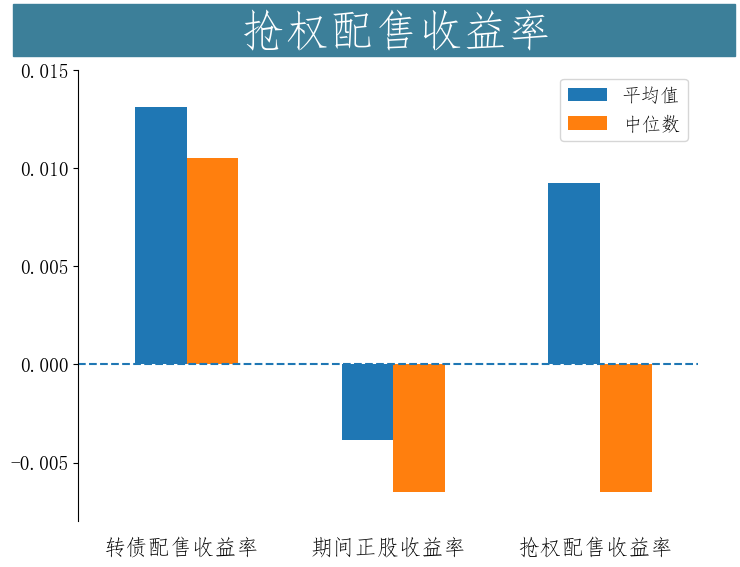

In [5]:
ps_profit_ratio = (df["shd_ration_ratio"]/(df["record_date_price"]+df["shd_ration_ratio"]))*cb_zf
zg_profit_ratio = (df["pay_date_price"]-df["record_date_price"])/(df["record_date_price"]+df["shd_ration_ratio"])
total_profit_ratio = ps_profit_ratio+zg_profit_ratio

fig,ax = plt.subplots(figsize=(8,6))
fig.text(x=0.05, y=0.92, s='          抢权配售收益率        ', fontsize=32, 
         weight='bold', color='white', backgroundcolor='#3c7f99')
mean_list = [np.mean(ps_profit_ratio),np.mean(zg_profit_ratio),np.mean(total_profit_ratio)]
median_list = [np.median(ps_profit_ratio),np.median(zg_profit_ratio),np.median(zg_profit_ratio)]
ax.bar([0.8,2.8,4.8],mean_list,width=0.5,label="平均值")
ax.bar([1.3,3.3,5.3],median_list,width=0.5,label="中位数")
ax.hlines(0,xmin=0,xmax=6,linestyles="dashed")
ax.tick_params(axis="x",length=0)
ax.tick_params(axis="both",labelsize=14)
ax.set_xticklabels(labels=["","转债配售收益率","","期间正股收益率","","抢权配售收益率"],size=16)
ax.spines['left'].set_bounds(-0.008, 0.015)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.margins(0,0.1)
plt.legend(fontsize=14)

ax.set_xticklabels(labels=["","转债配售收益率","","期间正股收益率","","抢权配售收益率"],size=16) 将x轴刻度数字替换成汉字标签<p>
ax.spines['left'].set_bounds(-0.008, 0.015)<p>
ax.spines['right'].set_visible(False)<p>
ax.spines['top'].set_visible(False)<p>
ax.spines['bottom'].set_visible(False)<p>
设置四个坐标轴是否可见

([<matplotlib.patches.Wedge at 0x7f1bf71bc6a0>,
 [Text(-0.3699632377845708, 1.0359185309125218, '转债部分占比'),
  Text(0.36996326203199353, -1.035918522252907, '正股部分占比')],
 [Text(-0.20179812970067498, 0.56504647140683, '10.9%'),
  Text(0.2017981429265419, -0.5650464666834037, '89.1%')])

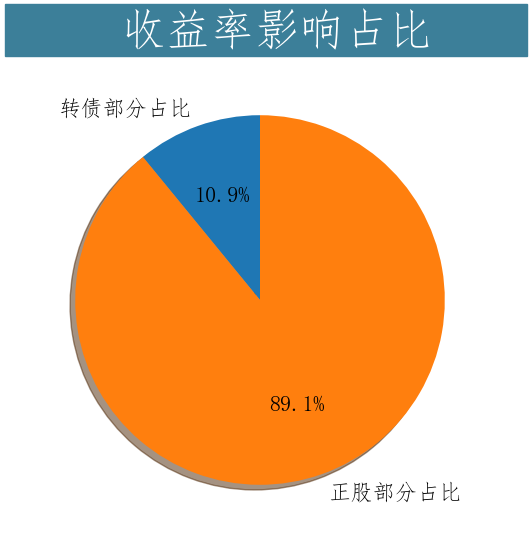

In [6]:
cb_ratio = np.mean(df["shd_ration_ratio"]/df["record_date_price"])
stock_ratio = 1-cb_ratio
fig, ax = plt.subplots(figsize=(8,6))
fig.text(x=0.2, y=0.92, s='     收益率影响占比    ', fontsize=32, 
         weight='bold', color='white', backgroundcolor='#3c7f99')
ax.pie([cb_ratio,stock_ratio], labels=["转债部分占比","正股部分占比"], autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={"size":16})

autopct='%1.1f%% 设置数字的保留位数